In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
data = pd.read_csv("data.txt", sep='  ', header=None)
data.head()

C:\Users\Vineeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
x = data.iloc[:,:16]
y = data.iloc[:,17]

x = x.drop(columns = [8,11,3,5])
x = np.array(x)
y = np.array(y)
y =y.reshape(len(y), 1)

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [6]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [7]:
def dsigmoid(x):
    return x*(1-x)

In [8]:
np.random.seed(3) #generates a value between 3
w0 = np.random.random((12,50)) - 1 #between layers 0 and 1
w1 = np.random.random((50,26)) - 1 #between layers 1 and 2
w2 = np.random.random((26,12)) - 1
w3 = np.random.random((12,1)) - 1

b0 = np.random.random((1,1)) - 1
b1 = np.random.random((1,1)) - 1
b2 = np.random.random((1,1)) - 1
b3 = np.random.random((1,1)) - 1

In [16]:
def feed_forward(data_in , w0, w1 ,w2,w3, b0,b1,b2,b3):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = sigmoid(np.dot(layer1,w1)+b1)
    layer3 = sigmoid(np.dot(layer2,w2)+b2)
    layer4 = np.dot(layer3,w3)+b3
    
    return layer0,layer1,layer2,layer3,layer4

In [17]:
def back_propogation(layer0,layer1,layer2,layer3,layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3,learning_rate, i):
    
    l4_error = layer4 - actual_y
    l4_delta = l4_error
    dh4 = np.dot(layer3.T,l4_delta)
    
    l3_error = np.dot(l4_delta,w3.T)
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T, l3_delta) #layer 1 change
    
    l2_error = np.dot(l3_delta,w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)#layer2 changes
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)#layer 3 changes
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
   # b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))#we use l2_delta as we get a unit value when differentiation with b is done
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer4 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print('\n', int(i),loss)
    
    return w0,w1,w2,w3,b0,b1,b2,b3
    

In [18]:
epochs = 10000
loss_curve = []
iters = []


In [19]:
for i in range(epochs):
    layer0,layer1,layer2,layer3,layer4 = feed_forward(xtrain,w0,w1,w2,w3,b0,b1,b2,b3)
    w0,w1,w2,w3,b0,b1,b2,b3 = back_propogation(layer0,layer1,layer2,layer3,layer4,ytrain, w0,w1,w2,w3,b0,b1,b2,b3,0.001,i)


 1000 1.1209741332429708

 2000 1.1213049427790027

 3000 1.1212326611116845

 4000 1.1212072557249404

 5000 1.1211922435298995

 6000 1.1211789722163852

 7000 1.1211580792791966

 8000 1.1210197237539377

 9000 1.1211824386206621


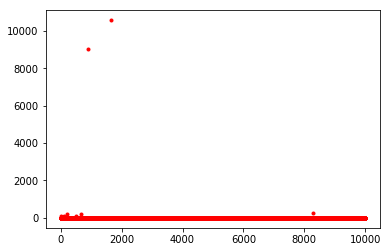

In [20]:
plt.plot(iters,loss_curve,"r.")

In [21]:
layer0,layer1,layer2,layer3,layer4 = feed_forward(xtest,w0,w1,w2,w3,b0,b1,b2,b3)
loss = np.sqrt(np.mean(np.power(layer4-ytest,2)))
loss


1.0587923614539088

In [22]:
c = feed_forward(xtest[:5],w0,w1,w2,w3,b0,b1,b2,b3)
c

(array([[5.1400000e+00, 1.5000000e+01, 2.1635636e+04, 8.4994350e+03,
         1.7528200e+02, 7.0602100e+02, 6.3892500e+02, 2.0770000e+00,
         1.1001000e+01, 1.0260000e+00, 2.4998000e+01, 4.9500000e-01],
        [9.3000000e+00, 2.7000000e+01, 7.2759055e+04, 9.7441290e+03,
         6.4490000e+02, 1.0826110e+03, 7.7868000e+02, 4.5340000e+00,
         2.3001000e+01, 1.0500000e+00, 9.0289000e+01, 1.7870000e+00],
        [3.1440000e+00, 9.0000000e+00, 8.3761260e+03, 7.0633470e+03,
         6.0317000e+01, 5.8035800e+02, 5.7822100e+02, 1.3910000e+00,
         7.5020000e+00, 1.0200000e+00, 1.2092000e+01, 2.3900000e-01],
        [4.1610000e+00, 1.2000000e+01, 1.4720579e+04, 7.7606700e+03,
         1.1375800e+02, 6.2457900e+02, 6.0240000e+02, 1.6600000e+00,
         8.8250000e+00, 1.0230000e+00, 1.6459000e+01, 3.2600000e-01],
        [6.1750000e+00, 1.8000000e+01, 2.9762464e+04, 8.8012670e+03,
         2.4593900e+02, 7.5872000e+02, 6.6220300e+02, 2.5110000e+00,
         1.3185000e+01, 1.0310

In [23]:
ytest[:5]

array([[0.994],
       [0.975],
       [0.987],
       [0.999],
       [0.993]])